# Analysis of the 20 Newsgroups Dataset

This notebook provides a comprehensive analysis of the 20 Newsgroups dataset, a popular dataset for text classification and machine learning tasks. We will explore the dataset, preprocess the text data, and perform basic visualization to understand the data's characteristics better.


In [17]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_20newsgroups
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('punkt')
nltk.download('stopwords')


[nltk_data] Downloading package punkt to
[nltk_data]     /Users/eduard.hogea/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/eduard.hogea/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [18]:
# Loading the 20 Newsgroups dataset
newsgroups = fetch_20newsgroups(subset='all')
documents = newsgroups.data
categories = newsgroups.target_names

# Displaying basic information about the dataset
print(f"Total number of documents: {len(documents)}")
print(f"Total number of categories: {len(categories)}")


Total number of documents: 18846
Total number of categories: 20


## Data Exploration

Let's start by exploring the dataset. We will look at the distribution of documents across different categories and examine a few sample documents to understand their content and structure.


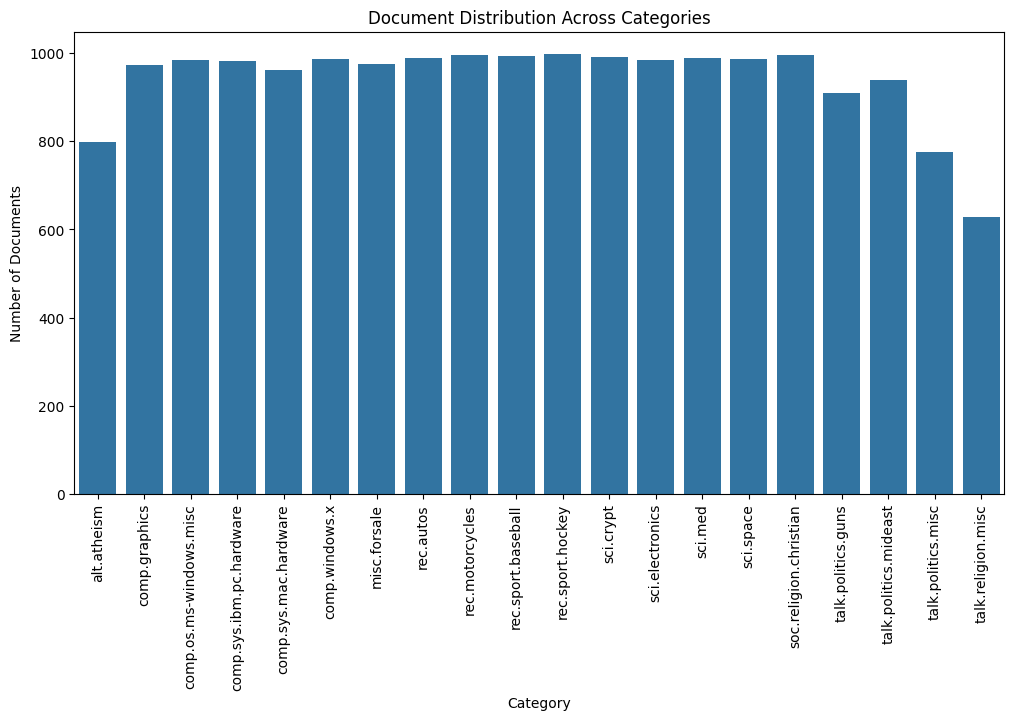

In [19]:
# Exploring the distribution of documents across categories
category_counts = pd.Series(newsgroups.target).value_counts().sort_index()
category_counts.index = [categories[i] for i in category_counts.index]

# Plotting the distribution
plt.figure(figsize=(12, 6))
sns.barplot(x=category_counts.index, y=category_counts.values)
plt.xticks(rotation=90)
plt.title("Document Distribution Across Categories")
plt.ylabel("Number of Documents")
plt.xlabel("Category")
plt.show()


In [20]:
# Displaying a few sample documents
for i in range(3):
    print(f"Document {i+1} (Category - {categories[newsgroups.target[i]]}):\n")
    print(documents[i][:500], "...")  # Displaying first 500 characters
    print("\n" + "-"*80 + "\n")


Document 1 (Category - rec.sport.hockey):

From: Mamatha Devineni Ratnam <mr47+@andrew.cmu.edu>
Subject: Pens fans reactions
Organization: Post Office, Carnegie Mellon, Pittsburgh, PA
Lines: 12
NNTP-Posting-Host: po4.andrew.cmu.edu



I am sure some bashers of Pens fans are pretty confused about the lack
of any kind of posts about the recent Pens massacre of the Devils. Actually,
I am  bit puzzled too and a bit relieved. However, I am going to put an end
to non-PIttsburghers' relief with a bit of praise for the Pens. Man, they
are killin ...

--------------------------------------------------------------------------------

Document 2 (Category - comp.sys.ibm.pc.hardware):

From: mblawson@midway.ecn.uoknor.edu (Matthew B Lawson)
Subject: Which high-performance VLB video card?
Summary: Seek recommendations for VLB video card
Nntp-Posting-Host: midway.ecn.uoknor.edu
Organization: Engineering Computer Network, University of Oklahoma, Norman, OK, USA
Keywords: orchid, stealth, vlb
Lines: 21

## Data Preprocessing

Before we can analyze the text data further, we need to preprocess it. This includes tokenizing the text, removing stopwords, and normalizing the words.


In [21]:
# Defining a function for text preprocessing
def preprocess_text(text):
    # Tokenization
    tokens = word_tokenize(text)

    # Removing stopwords and non-alphabetic words
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [w for w in tokens if w.isalpha() and not w.lower() in stop_words]

    return filtered_tokens

# Testing the function on a sample document
sample_doc = documents[0]
preprocessed_sample = preprocess_text(sample_doc)
print("Original Text:\n", sample_doc[:500])
print("\nPreprocessed Text:\n", preprocessed_sample[:50])


Original Text:
 From: Mamatha Devineni Ratnam <mr47+@andrew.cmu.edu>
Subject: Pens fans reactions
Organization: Post Office, Carnegie Mellon, Pittsburgh, PA
Lines: 12
NNTP-Posting-Host: po4.andrew.cmu.edu



I am sure some bashers of Pens fans are pretty confused about the lack
of any kind of posts about the recent Pens massacre of the Devils. Actually,
I am  bit puzzled too and a bit relieved. However, I am going to put an end
to non-PIttsburghers' relief with a bit of praise for the Pens. Man, they
are killin

Preprocessed Text:
 ['Mamatha', 'Devineni', 'Ratnam', 'Subject', 'Pens', 'fans', 'reactions', 'Organization', 'Post', 'Office', 'Carnegie', 'Mellon', 'Pittsburgh', 'PA', 'Lines', 'sure', 'bashers', 'Pens', 'fans', 'pretty', 'confused', 'lack', 'kind', 'posts', 'recent', 'Pens', 'massacre', 'Devils', 'Actually', 'bit', 'puzzled', 'bit', 'relieved', 'However', 'going', 'put', 'end', 'relief', 'bit', 'praise', 'Pens', 'Man', 'killing', 'Devils', 'worse', 'thought', 'Jagr', 'showed

## Data Visualization

With the text data preprocessed, let's visualize some key aspects like the most common words and the distribution of document lengths.


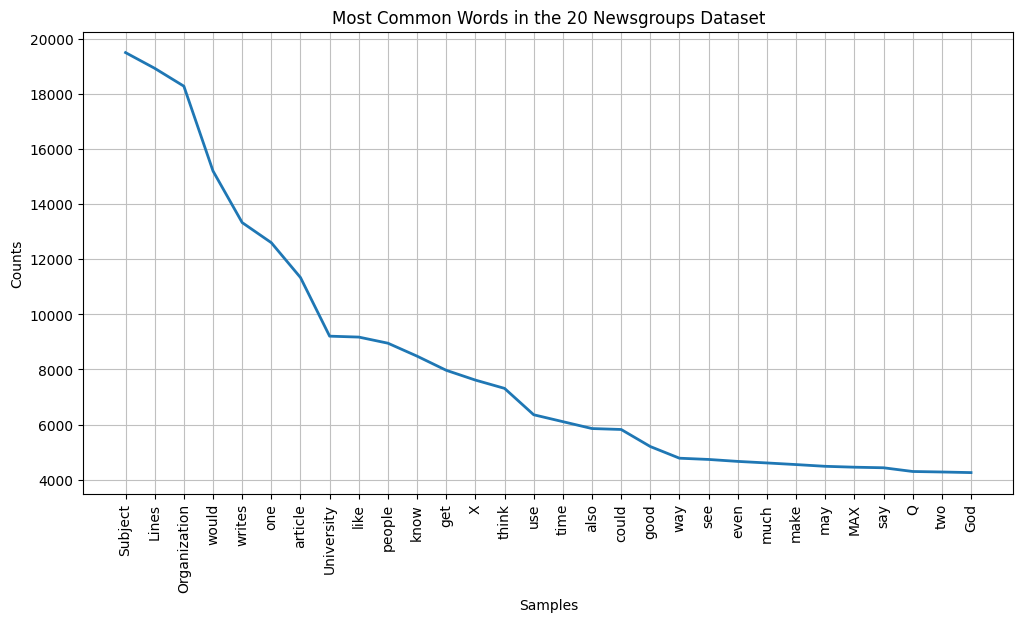

<Axes: title={'center': 'Most Common Words in the 20 Newsgroups Dataset'}, xlabel='Samples', ylabel='Counts'>

In [22]:
# Collecting all words from the documents
all_words = []
for doc in documents:
    all_words.extend(preprocess_text(doc))
    
# Frequency distribution of words
word_freq = nltk.FreqDist(all_words)

# Plotting the most common words
plt.figure(figsize=(12, 6))
word_freq.plot(30, title="Most Common Words in the 20 Newsgroups Dataset")

/var/folders/9m/k3vyv4317cz56g6f681k4jnm0000gn/T/ipykernel_2432/179294040.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(category_doc_lengths[category], label=category, hist=False)
/var/folders/9m/k3vyv4317cz56g6f681k4jnm0000gn/T/ipykernel_2432/179294040.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed297445

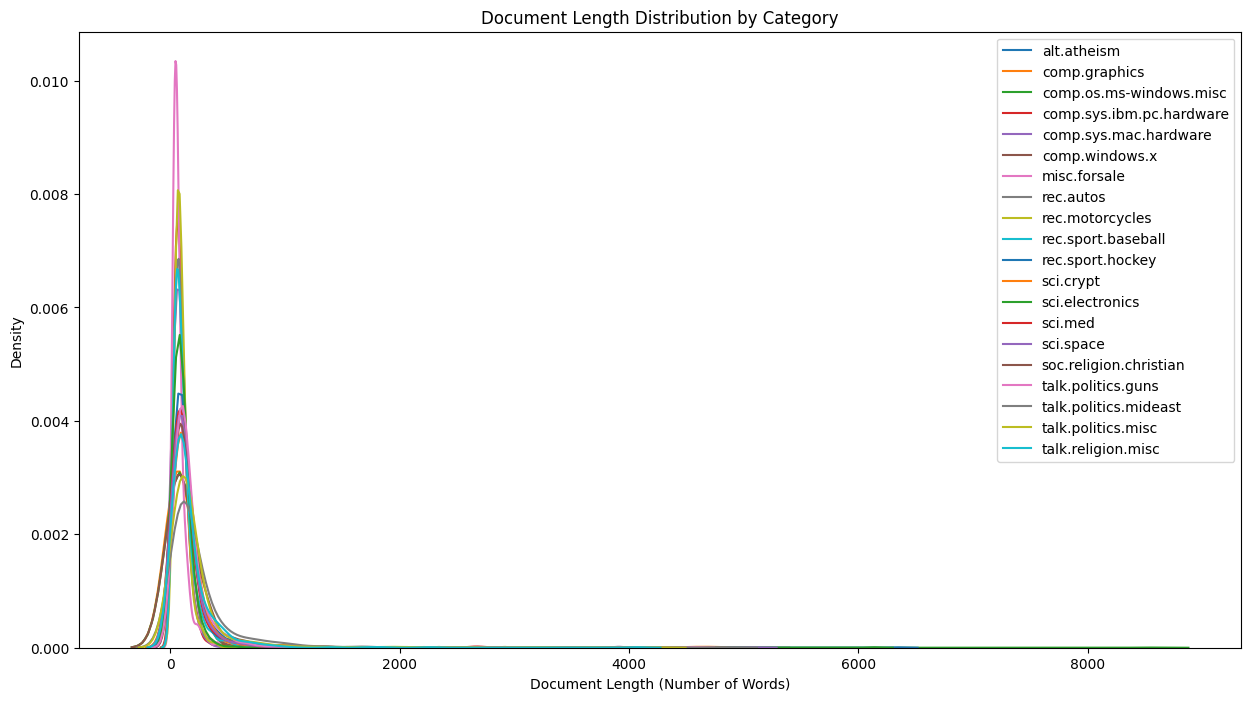

In [24]:
# Category-wise Document Length Distribution
category_doc_lengths = {category: [] for category in categories}

for doc, label in zip(documents, newsgroups.target):
    category_doc_lengths[categories[label]].append(len(preprocess_text(doc)))

plt.figure(figsize=(15, 8))
for category in categories:
    sns.distplot(category_doc_lengths[category], label=category, hist=False)

plt.title("Document Length Distribution by Category")
plt.xlabel("Document Length (Number of Words)")
plt.ylabel("Density")
plt.legend()
plt.show()


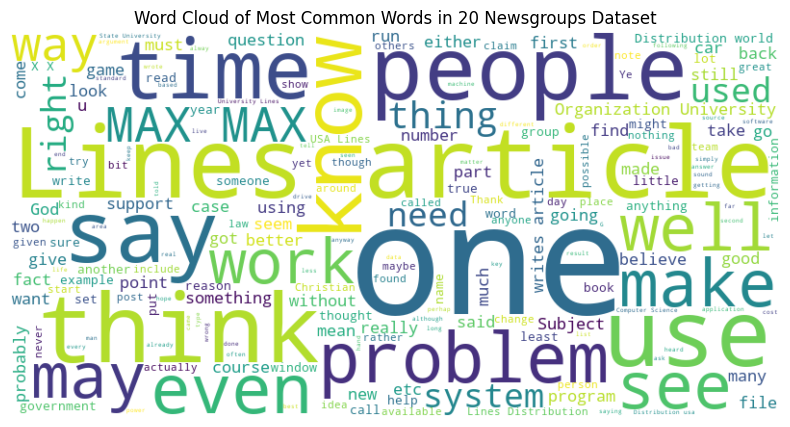

In [26]:
from wordcloud import WordCloud

# Generating a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(" ".join(all_words))

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of Most Common Words in 20 Newsgroups Dataset")
plt.show()


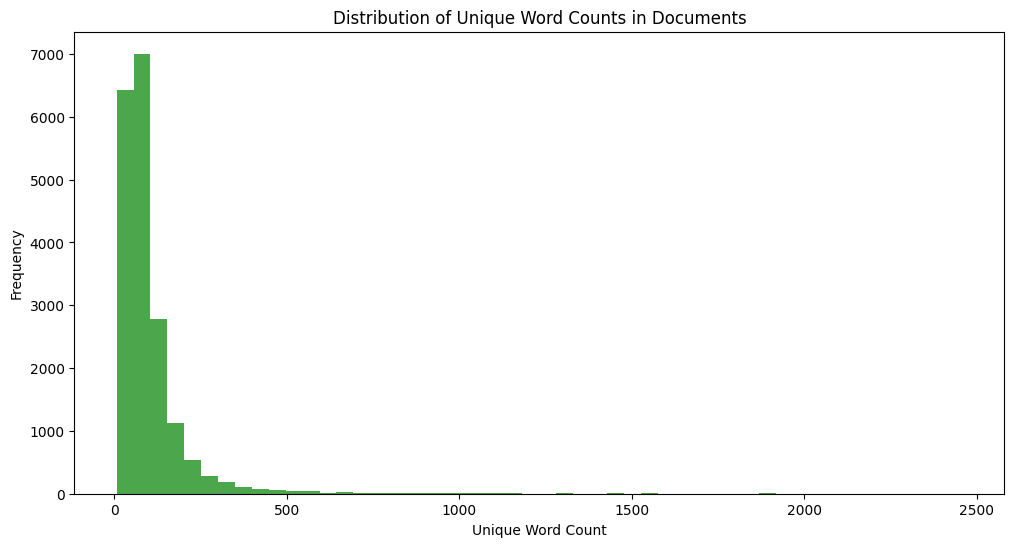

In [29]:
# Unique Word Count Distribution
unique_word_counts = [len(set(preprocess_text(doc))) for doc in documents]

plt.figure(figsize=(12, 6))
plt.hist(unique_word_counts, bins=50, color='green', alpha=0.7)
plt.title("Distribution of Unique Word Counts in Documents")
plt.xlabel("Unique Word Count")
plt.ylabel("Frequency")
plt.show()


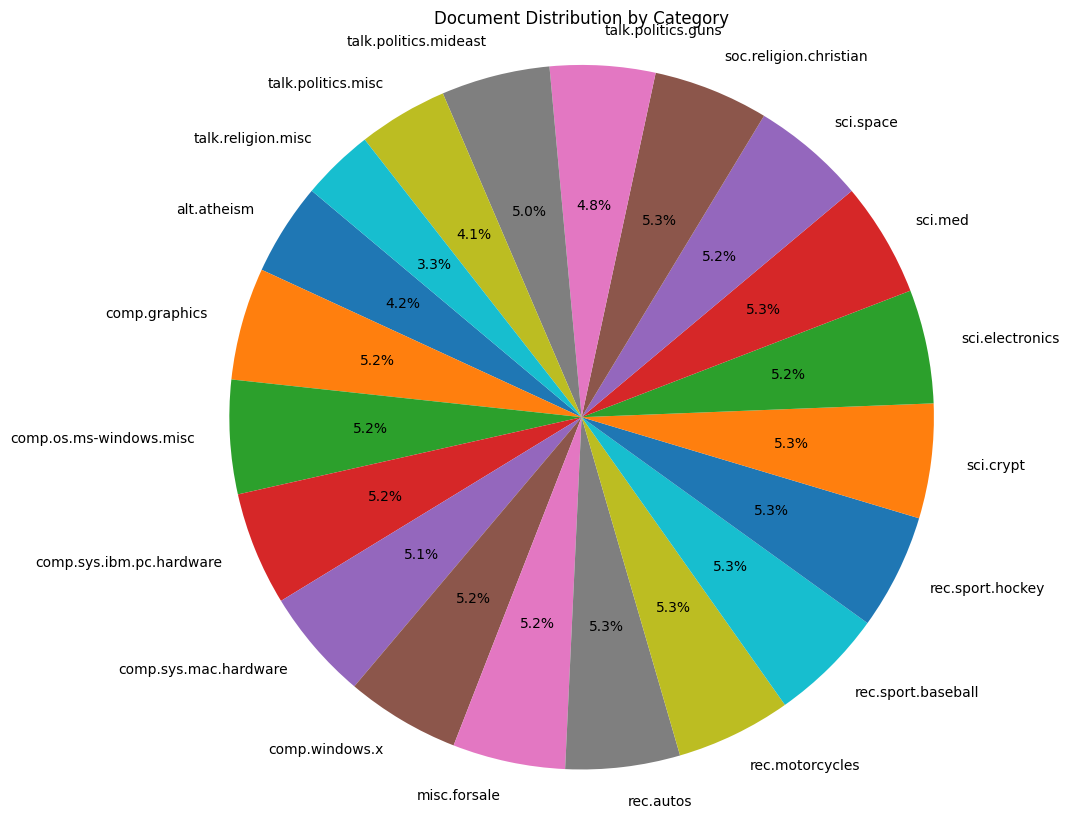

In [30]:
# Pie Chart of Document Distribution by Category
plt.figure(figsize=(10, 10))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.
plt.title("Document Distribution by Category")
plt.show()
